# Import Libraries

In [127]:
import pickle

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

# view all columns
pd.set_option('display.max_columns', None)

dataset source: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

# Explore Data

In [128]:
df = pd.read_csv("dataset/kc_house_data.csv")
# remove unused columns
df = df.drop(columns=["sqft_living15", "sqft_lot15", "sqft_above", "sqft_basement"])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0,98074,47.6168,-122.045


In [129]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            21613 non-null  int64  
 1   date          21613 non-null  object 
 2   price         21613 non-null  float64
 3   bedrooms      21613 non-null  int64  
 4   bathrooms     21613 non-null  float64
 5   sqft_living   21613 non-null  int64  
 6   sqft_lot      21613 non-null  int64  
 7   floors        21613 non-null  float64
 8   waterfront    21613 non-null  int64  
 9   view          21613 non-null  int64  
 10  condition     21613 non-null  int64  
 11  grade         21613 non-null  int64  
 12  yr_built      21613 non-null  int64  
 13  yr_renovated  21613 non-null  int64  
 14  zipcode       21613 non-null  int64  
 15  lat           21613 non-null  float64
 16  long          21613 non-null  float64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.8+ MB


In [131]:
# check for missing value
df.isnull().sum()

id              0
date            0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
zipcode         0
lat             0
long            0
dtype: int64

<Axes: >

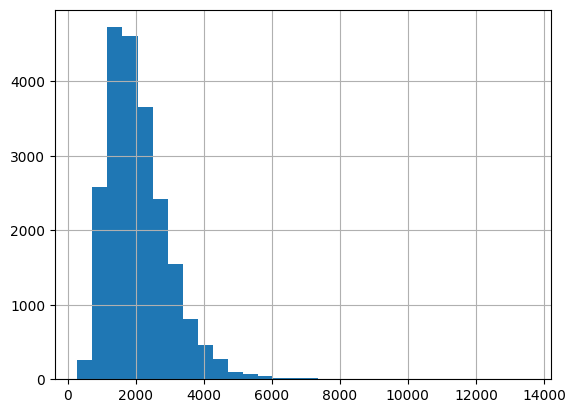

In [132]:
# df['price'].hist(bins=30)
# df['grade'].hist(bins=30)
df['sqft_living'].hist(bins=30)


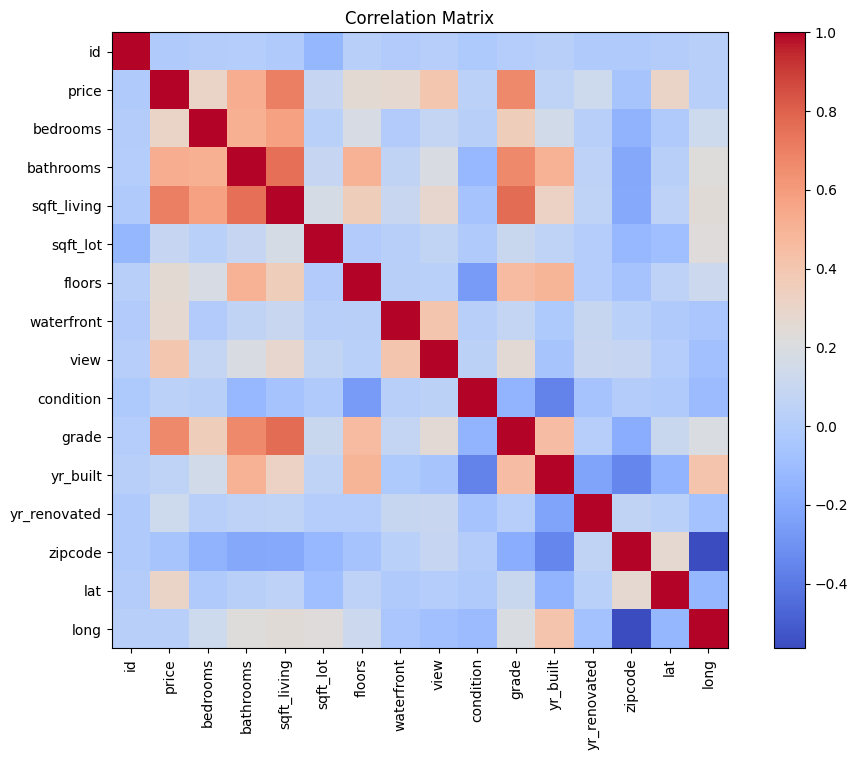

In [133]:
df_corr = df.drop(columns=['date'])
corr = df_corr.corr()

plt.figure(figsize=(12, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix")
plt.show()

# Prepare data

In [134]:
# remove unused columns
df = df.drop(columns=['id', 'date', 'zipcode'])

In [135]:
# separate features variable and target variable
X = df.drop('price', axis=1)
Y = df['price']

In [136]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'lat', 'long'],
      dtype='object')

## view categorical values

In [137]:
X['waterfront'].value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

In [138]:
X['view'].value_counts()

view
0    19489
2      963
3      510
1      332
4      319
Name: count, dtype: int64

In [139]:
X['floors'].value_counts()

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

## split categorical & numerical variables

In [140]:
categorical = ['waterfront', 'view']
numeric = [col for col in X.columns if col not in categorical]

In [141]:
print(f'categorical: {categorical}')
print(f'numeric: {numeric}')

categorical: ['waterfront', 'view']
numeric: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 'yr_built', 'yr_renovated', 'lat', 'long']


## encode categorical variable

In [142]:
one_hot_en = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded = one_hot_en.fit_transform(X[categorical])

In [143]:
encoded_df = pd.DataFrame(encoded, columns=one_hot_en.get_feature_names_out(categorical))
encoded_df

,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
21608,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21609,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21610,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21611,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Finalize features

In [144]:
numeric_df = X.drop(columns=categorical)
final_df = pd.concat([numeric_df, encoded_df], axis=1)

In [145]:
final_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4
0,3,1.00,1180,5650,1.0,3,7,1955,0,47.5112,-122.257,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,2.25,2570,7242,2.0,3,7,1951,1991,47.7210,-122.319,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,1.00,770,10000,1.0,3,6,1933,0,47.7379,-122.233,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,3.00,1960,5000,1.0,5,7,1965,0,47.5208,-122.393,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,2.00,1680,8080,1.0,3,8,1987,0,47.6168,-122.045,1.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,3,8,2009,0,47.6993,-122.346,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21609,4,2.50,2310,5813,2.0,3,8,2014,0,47.5107,-122.362,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21610,2,0.75,1020,1350,2.0,3,7,2009,0,47.5944,-122.299,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21611,3,2.50,1600,2388,2.0,3,8,2004,0,47.5345,-122.069,1.0,0.0,1.0,0.0,0.0,0.0,0.0


## Split train & test data

In [146]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df, Y, test_size=0.2, random_state=42
)

In [147]:
X_train.shape, X_test.shape

((17290, 18), (4323, 18))

## feature scaling

In [148]:
num_cols = numeric_df.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [149]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4
6325,-0.395263,-0.474451,-0.323933,-0.043873,-0.919600,0.909073,1.150243,0.404001,-0.208294,-1.396608,0.442288,1.0,0.0,1.0,0.0,0.0,0.0,0.0
13473,-1.468964,-1.452583,-1.183653,-0.285775,-0.919600,-0.625426,-1.413156,-1.430565,-0.208294,-0.060172,-0.539958,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17614,-0.395263,-1.452583,-1.095477,-0.188293,0.001545,-0.625426,-1.413156,-0.988910,-0.208294,-0.552847,-0.860256,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16970,-0.395263,0.177636,0.017751,-0.187933,-0.919600,0.909073,-0.558690,0.200160,-0.208294,-1.193614,0.299934,1.0,0.0,1.0,0.0,0.0,0.0,0.0
20868,-1.468964,0.503680,-0.366919,-0.343991,0.922690,-0.625426,0.295777,1.219364,-0.208294,1.040039,0.036578,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [150]:
X_train.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,lat,long,waterfront_0,waterfront_1,view_0,view_1,view_2,view_3,view_4
count,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000
mean,-6.328721e-17,-1.290401e-16,-1.779439e-16,-2.712309e-17,2.054779e-17,3.172579e-16,-2.999978e-16,-5.161606e-16,9.041030e-18,-1.586906e-14,3.110607e-14,0.992828,0.007172,0.901446,0.015905,0.045286,0.022903,0.014459
std,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,1.000029e+00,0.084385,0.084385,0.298071,0.125112,0.207937,0.149600,0.119377
min,-3.616365e+00,-2.756759e+00,-1.966219e+00,-3.676528e-01,-9.195998e-01,-3.694422e+00,-5.685488e+00,-2.415795e+00,-2.082939e-01,-2.897027e+00,-2.169918e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.952633e-01,-8.004954e-01,-7.097046e-01,-2.522701e-01,-9.195998e-01,-6.254257e-01,-5.586896e-01,-6.831492e-01,-2.082939e-01,-6.380903e-01,-8.175497e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-3.952633e-01,1.776364e-01,-1.806459e-01,-1.853577e-01,1.545009e-03,-6.254257e-01,-5.586896e-01,1.322135e-01,-2.082939e-01,8.286219e-02,-1.200122e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,6.784371e-01,5.036804e-01,5.137437e-01,-1.079403e-01,9.226898e-01,9.090727e-01,2.957768e-01,8.796293e-01,-2.082939e-01,8.500482e-01,6.344672e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.181575e+01,7.676647e+00,1.099572e+01,2.960995e+01,3.686124e+00,2.443571e+00,4.568109e+00,1.491151e+00,4.848273e+00,1.569556e+00,6.399828e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## model training

In [151]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [152]:
print(model.score(X_test, y_test))

0.8520183112418512


## model evaluation

In [153]:
y_pred = model.predict(X_test)

In [154]:
print("RMSE:", root_mean_squared_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))

RMSE: 149570.6695200445
MSE: 22371385180.674366
R2: 0.8520183112418512


- R2 indicates model performs well on test set
- RMSE indicates the model differs the price by around 140k, it is good if the market price is more than 500k
- MAE is the squared of RMSE

## save model

In [155]:
with open("model/encoder.pkl", "wb") as f:
    pickle.dump(one_hot_en, f)

In [156]:
with open("model/scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [157]:
# Save the trained model
with open("model/xgb_r_model.pkl", "wb") as f:
    pickle.dump(model, f)